In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

d = pd.read_csv("Clean_Dataset.csv")
print("Head")
display(d.head())
print("Shape")
display(d.shape)
print("Data Types")
display(d.dtypes)
print("NAN Values")
display(d.isnull().sum())
print("Statistics")
display(d.describe().T)

Head


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Shape


(300153, 12)

Data Types


Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

NAN Values


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Statistics


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [ ]:
# x = d.drop(['price'], axis = 1)
# x = x.drop(['Unnamed: 0'], axis = 1)
# y = d['price']
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# sample_weight = np.array([class_weights[i] for i in y_train])

<Axes: xlabel='airline'>

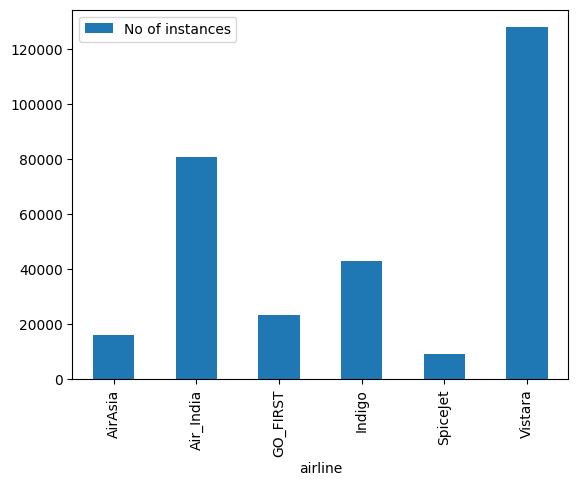

In [ ]:
x=d.groupby('airline').count()
x=x[['Unnamed: 0']]
x.columns=['No of instances']
x.plot.bar()

<Axes: xlabel='stops'>

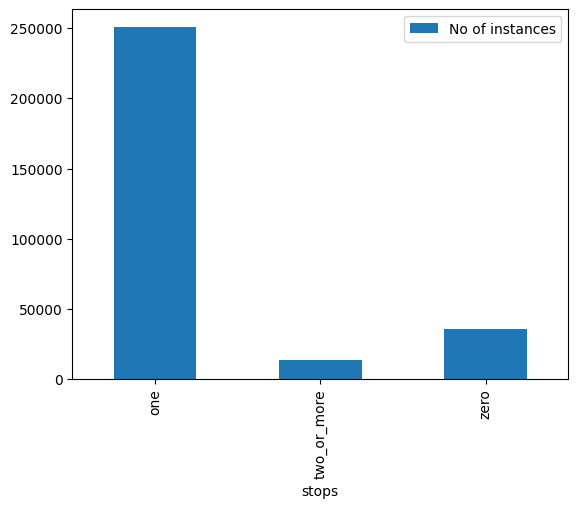

In [ ]:
x=d.groupby('stops').count()
x=x[['Unnamed: 0']]
x.columns=['No of instances']
x.plot.bar()

<Axes: ylabel='No of instances'>

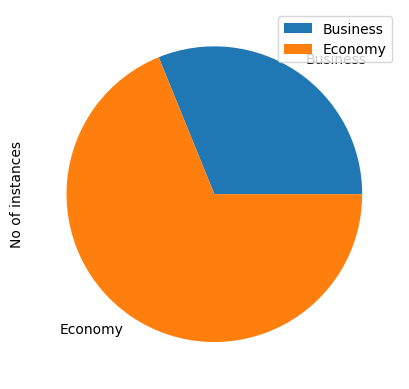

In [ ]:
x=d.groupby('class').count()
x=x[['Unnamed: 0']]
x.columns=['No of instances']
x.plot.pie(y='No of instances')

In [ ]:
# d= d.sample(frac=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
x = d.drop(['price'], axis = 1)
x = x.drop(['Unnamed: 0'], axis = 1)
y = d['price']
d = d.dropna(axis=0)
numerical_features = x.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns
print(numerical_features)
non_integer_columns = x.select_dtypes(exclude=['int', 'int64', 'float', 'float64']).columns
print(non_integer_columns)
x.head()

Index(['duration', 'days_left'], dtype='object')
Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [ ]:
non_integer_columns = x.select_dtypes(exclude=['int', 'int64', 'float', 'float64']).columns
label_encoder = LabelEncoder()
for col in non_integer_columns:
    x[col] = label_encoder.fit_transform(x[col])
x.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1


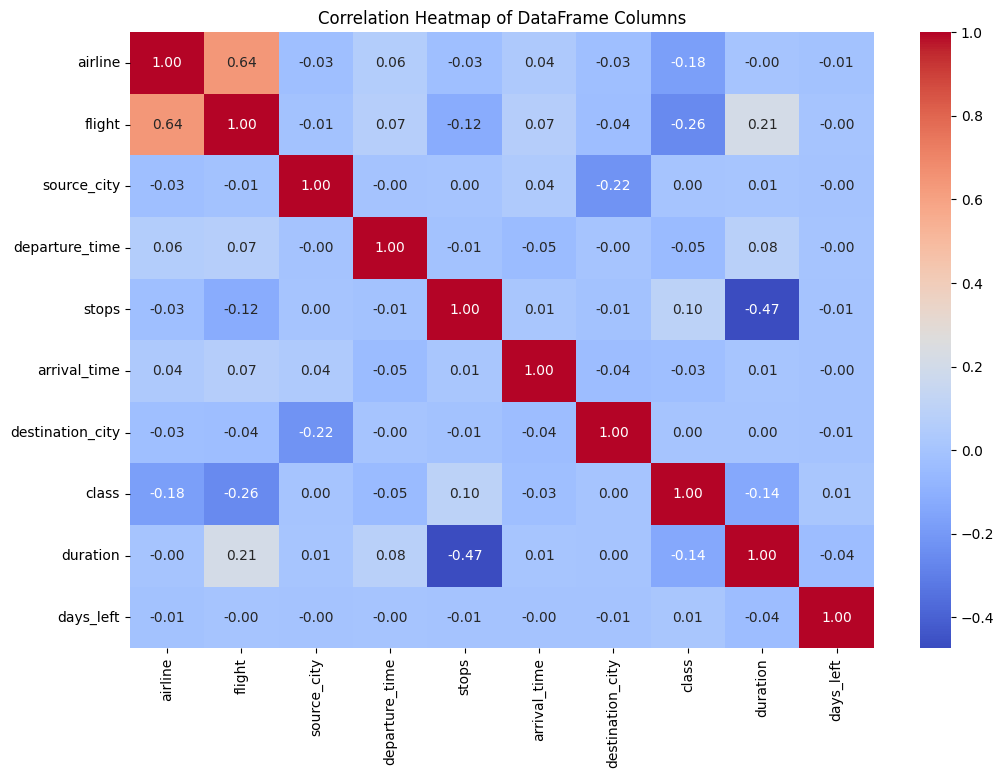

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

In [ ]:
numerical_data = x[numerical_features]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)
x_1 = pd.DataFrame(normalized_data, columns=numerical_features)
for col in numerical_features:
    x[col] = x_1[col]
x.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,-1.397531,-1.843875
1,4,1387,2,1,2,4,5,1,-1.375284,-1.843875
2,0,1213,2,1,2,1,5,1,-1.397531,-1.843875
3,5,1559,2,4,2,0,5,1,-1.386407,-1.843875
4,5,1549,2,4,2,4,5,1,-1.375284,-1.843875


In [ ]:
from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()

imputer = SimpleImputer(strategy='mean')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
print("Training data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test ,y_test_pred)
print("")
print("Testing data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

Training data:
Mean squared error:  49124546.63760724
R2:  0.9046334714022543
RMSE:  7008.890542561443
MAE:  4644.421486268268

Testing data:
Mean squared error:  49190002.62043739
R2:  0.9045747930770209
RMSE:  7013.558484851851
MAE:  4622.187103361367


In [ ]:
lasso_reg = linear_model.Lasso(alpha = 50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train, y_train)
lasso_reg.fit(x_test, y_test)
train_predicted = lasso_reg.predict(x_train)
test_predicted = lasso_reg.predict(x_test)
print("Using L1 linearization: ")
mse = mean_squared_error(y_train, train_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, train_predicted)
print("Training data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)
mse = mean_squared_error(y_test, test_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predicted)
mae = mean_absolute_error(y_test, test_predicted)
print("")
print("Testing data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

Using L1 linearization: 
Training data:
Mean squared error:  51471232.72424372
R2:  0.9046334714022543
RMSE:  7174.34545615443
MAE:  4857.62440484727

Testing data:
Mean squared error:  51516674.85364697
R2:  0.9000612096765653
RMSE:  7177.511745281018
MAE:  4833.368328818567


In [ ]:
ridge_reg = Ridge(alpha = 50, max_iter=100, tol=0.1)
ridge_reg.fit(x_train, y_train)
ridge_reg.fit(x_test, y_test)
train_predicted = ridge_reg.predict(x_train)
test_predicted = ridge_reg.predict(x_test)
print("Using L2 linearization: ")
mse = mean_squared_error(y_train, train_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, train_predicted)
print("Training data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)
mse = mean_squared_error(y_test, test_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predicted)
mae = mean_absolute_error(y_test, test_predicted)
print("")
print("Testing data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

Using L2 linearization: 
Training data:
Mean squared error:  49139124.15748768
R2:  0.9046334714022543
RMSE:  7009.930396051567
MAE:  4640.2797689183235

Testing data:
Mean squared error:  49191587.616292275
R2:  0.9045717182945576
RMSE:  7013.671479068026
MAE:  4617.128062157421


In [ ]:
# x = scale(x)
# y = scale(y)
# xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)
# imputer = SimpleImputer(strategy='mean')
# xtrain = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
# xtest = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)
# sgdr = SGDRegressor()
# sgdr.fit(xtrain, ytrain)
# y_pred = model.predict(x_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# print("Analytics based on SGDRegressor: ")
# mse = mean_squared_error(y_train, train_predicted)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_train, y_train_pred)
# mae = mean_absolute_error(y_train, train_predicted)
# print("Training data:")
# print("Mean squared error: ", mse)
# print("R2: ", r2)
# print("RMSE: ", rmse)
# print("MAE: ", mae)
# print("Testing data:")
# print("Mean squared error: ", mse)
# print("R2: ", r2)
# print("RMSE: ", rmse)
# print("MAE: ", mae)

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(x_train, y_train)
# y_train_pred = model.predict(x_train)
# y_test_pred = model.predict(x_test)
# mse_train = mean_squared_error(y_train, y_train_pred)
# rmse_train = np.sqrt(mse_train)
# r2_train = r2_score(y_train, y_train_pred)
# mae_train = mean_absolute_error(y_train, y_train_pred)
# print("Training data:")
# print("Mean squared error: ", mse_train)
# print("R2: ", r2_train)
# print("RMSE: ", rmse_train)
# print("MAE: ", mae_train)
# mse_test = mean_squared_error(y_test, y_test_pred)
# rmse_test = np.sqrt(mse_test)
# r2_test = r2_score(y_test, y_test_pred)
# mae_test = mean_absolute_error(y_test, y_test_pred)
# print("\nTesting data:")
# print("Mean squared error: ", mse_test)
# print("R2: ", r2_test)
# print("RMSE: ", rmse_test)
# print("MAE: ", mae_test)

In [ ]:
# from sklearn.svm import SVR
# model = SVR()
# model.fit(x_train, y_train)
# y_train_pred = model.predict(x_train)
# y_test_pred = model.predict(x_test)
# mse_train = mean_squared_error(y_train, y_train_pred)
# rmse_train = np.sqrt(mse_train)
# r2_train = r2_score(y_train, y_train_pred)
# mae_train = mean_absolute_error(y_train, y_train_pred)
# print("Training data:")
# print("Mean squared error: ", mse_train)
# print("R2: ", r2_train)
# print("RMSE: ", rmse_train)
# print("MAE: ", mae_train)
# mse_test = mean_squared_error(y_test, y_test_pred)
# rmse_test = np.sqrt(mse_test)
# r2_test = r2_score(y_test, y_test_pred)
# mae_test = mean_absolute_error(y_test, y_test_pred)
# print("\nTesting data:")
# print("Mean squared error: ", mse_test)
# print("R2: ", r2_test)
# print("RMSE: ", rmse_test)
# print("MAE: ", mae_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Training data:")
print("Mean squared error: ", mse_train)
print("R2: ", r2_train)
print("RMSE: ", rmse_train)
print("MAE: ", mae_train)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("\nTesting data:")
print("Mean squared error: ", mse_test)
print("R2: ", r2_test)
print("RMSE: ", rmse_test)
print("MAE: ", mae_test)

Training data:
Mean squared error:  52732.817387966665
R2:  0.9998976286585489
RMSE:  229.63627193448048
MAE:  11.837750532368268

Testing data:
Mean squared error:  8798775.039998315
R2:  0.982930984262405
RMSE:  2966.2729206865497
MAE:  892.6192828149901


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Training data:")
print("Mean squared error: ", mse_train)
print("R2: ", r2_train)
print("RMSE: ", rmse_train)
print("MAE: ", mae_train)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("\nTesting data:")
print("Mean squared error: ", mse_test)
print("R2: ", r2_test)
print("RMSE: ", rmse_test)
print("MAE: ", mae_test)

Training data:
Mean squared error:  769307.1466485786
R2:  0.9985065276522034
RMSE:  877.1015600536682
MAE:  324.9695370308122

Testing data:
Mean squared error:  5395104.464499838
R2:  0.9895338700453314
RMSE:  2322.736417353428
MAE:  865.0561041108258


In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.linear_model import LinearRegression
# degrees = range(2, 7)
# r2_train_values = []
# r2_test_values = []

# for degree in degrees:
#     # Use PolynomialFeatures to add polynomial features
#     poly = PolynomialFeatures(degree)
#     model = make_pipeline(poly, LinearRegression())

#     # Train the model
#     model.fit(x_train, y_train)

#     # Make predictions on the training set
#     y_train_pred = model.predict(x_train)

#     # Make predictions on the testing set
#     y_test_pred = model.predict(x_test)

#     # Evaluate the model on the training set
#     mse_train = mean_squared_error(y_train, y_train_pred)
#     rmse_train = (np.sqrt(mse_train))
#     r2_train = r2_score(y_train, y_train_pred)
#     mae_train = mean_absolute_error(y_train, y_train_pred)

#     # Evaluate the model on the testing set
#     mse_test = mean_squared_error(y_test, y_test_pred)
#     rmse_test = (np.sqrt(mse_test))
#     r2_test = r2_score(y_test, y_test_pred)
#     mae_test = mean_absolute_error(y_test, y_test_pred)

#     print(f"\nResults for Polynomial Degree {degree}:")
#     print("Training data:")
#     print("Mean squared error: ", mse_train)
#     print("R2: ", r2_train)
#     print("RMSE: ", rmse_train)
#     print("MAE: ", mae_train)

#     print("Testing data:")
#     print("Mean squared error: ", mse_test)
#     print("R2: ", r2_test)
#     print("RMSE: ", rmse_test)
#     print("MAE: ", mae_test)

#     r2_train_values.append(r2_train)
#     r2_test_values.append(r2_test)

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(degrees, r2_train_values, label='Training R-squared')
# plt.plot(degrees, r2_test_values, label='Testing R-squared')
# plt.title('R-squared vs Polynomial Degree')
# plt.xlabel('Polynomial Degree')
# plt.ylabel('R-squared Value')
# plt.legend()
# plt.show()

In [ ]:
# model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'SGD Regressor', 'Gaussian', 'SVM', 'Decision Tree', 'Random Forest', 'Polynomial Regression']
# r2_values = ['0.9045747930770209', '0.9000612096765653', '0.9045717182945576', '0.9046334714022543', '0.9341021023370764', '0.92', '0.982930984262405', '0.9895338700453314', '0.99']
# plt.figure(figsize=(10, 6))
# plt.bar(model_names, r2_values)
# plt.xlabel('Models')
# plt.ylabel('R^2 Value')
# plt.title('Comparison of R^2 Values for Different Models')
# plt.ylim(0, 1)
# plt.xticks(rotation=45, ha='right')
# plt.show()